In [348]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import plotly.express as ex
from scipy.stats import ttest_rel,ttest_ind

import matplotlib as matplot
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [349]:
EV = pd.read_csv('C:/Users/HP/Desktop/DS Project by FEYNN LAB/For Project EV/For 3/ElectricCarData_Clean.csv')
EV.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### EDA

In [350]:
EV.shape

(103, 14)

In [351]:
EV.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [352]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [353]:
EV.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [354]:
EV.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [355]:
EV.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [356]:
EV.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [357]:
for i in EV.columns :
    z=EV[i].value_counts().sum()
    print(z)

103
103
103
103
103
103
103
103
103
103
103
103
103
103


In [358]:
EV["AccelSec"].value_counts().sum()

103

<AxesSubplot:>

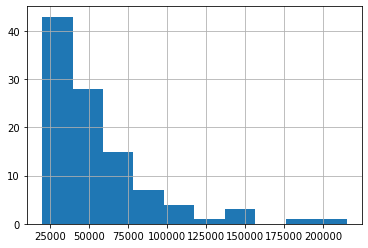

In [359]:
EV['PriceEuro'].hist(bins=10)

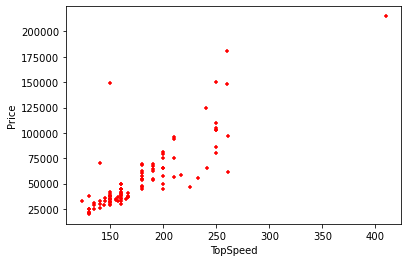

In [360]:
EV.plot(kind="scatter",x='TopSpeed_KmH',y='PriceEuro',color='Red',marker='+')
plt.xlabel("TopSpeed")
plt.ylabel("Price")
plt.show()

In [361]:
EV.groupby('PowerTrain')['Model'].agg('count').reset_index()

,PowerTrain,Model
0,AWD,41
1,FWD,37
2,RWD,25


In [362]:
EV.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


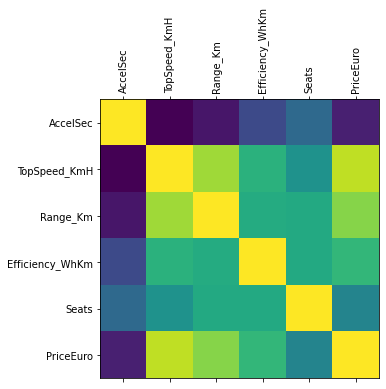

In [371]:
f = plt.figure(figsize = (5, 5))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns)
plt.show()

In [372]:
x=EV.select_dtypes(exclude=["object"]).columns
x

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats',
       'PriceEuro'],
      dtype='object')

AccelSec


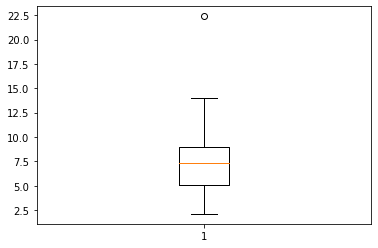

TopSpeed_KmH


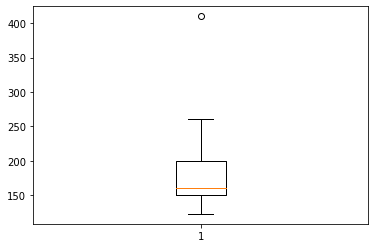

Range_Km


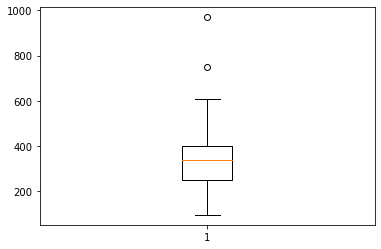

Efficiency_WhKm


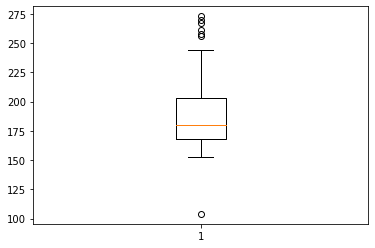

Seats


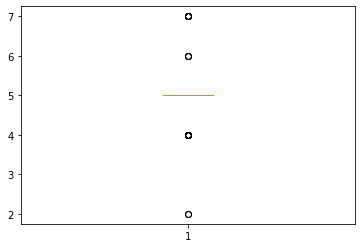

PriceEuro


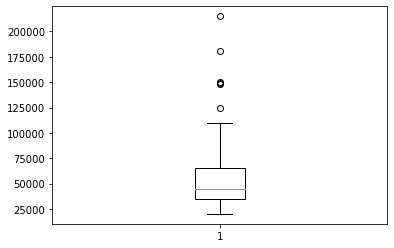

In [373]:
for i in x:
    plt.figure(i)
    print(i)
    plt.boxplot(df[i])
    plt.show()

### Brand vs Price_Euro

In [363]:
fig = ex.box(EV,x='PriceEuro',y ='Brand' , color='Brand', points='all', hover_data=['Model'] ,
           height=1000, width= 900, orientation='h', title='Price and Brand' , template='ggplot2' ,
            labels=dict(PriceEuro='Price (€)'))
fig.show()

We can see from this graph that Porsche have the most expensive cars in the market with the average price of 148.301k Euro, but the Tesla Roadster is the most expensive with the price 215k Euro and the SEAT Mii Electric and Smart is the most affordable with the price range of 20-21k Euro.

### Acceleration and Top_Speed

In [365]:
fig = ex.scatter(EV,x = 'TopSpeed_KmH',y = 'AccelSec', color = 'Brand', hover_data=['Model'] ,
           opacity=0.8 , title='Acceleration and Top Speed' , height=650 , width=900 , template='ggplot2' ,
                labels=dict(AccelSec='Acceleration (Sec)', TopSpeed_KmH='Top Speed (Km/H)'))

fig.update_traces(marker={'size': 8}) # adjusting the markers size
fig.show()

 We can see from here that the Tesla Roadster can go from 0 to 100 Km/H in 2.1 Seconds and its top speed is 410 Km/H, which make it the best car in terms of top speed and acceleration, with most of the cars lying between 140-270 Km/H top speed and 2-10 Seconds acceleration.

###  Range and Fast Charging

In [366]:
fig = ex.scatter(EV, x = 'FastCharge_KmH', y = 'Range_Km', color = 'Brand', hover_data=['Model'] ,
           opacity=0.8 , title='Range and Fast Charging' , height=650 , width=900 , template='ggplot2' ,
                labels=dict(Range_Km='Range (Km)', FastCharge_KmH='Fast Charging (Km/H)'))

fig.update_traces(marker={'size': 8}) # adjusting the markers size
fig.show()

We can see here that in general, Tesla and Porscha cars have the best charging rates ranging between 700-970 Km/H, with Tesla topping in the range with some of their cars that can go over 500 Km with a full battery.

### Price and Range

In [370]:
fig = ex.histogram(EV, x='Range_Km', y='PriceEuro', color='Brand', barmode='group', histfunc='avg', 
                   height=400 , width=1000 , nbins=10 , template='ggplot2' , title='Average Price and Range' ,
                    labels=dict(PriceEuro='Price (€)', Range_Km='Range (Km)'))

fig.show()

This histogram shows the average price of each brand's cars in a certain range. We can see on here that most of the cars ranging 200-500 Km with their price going between 25-150k Euro depending on the brand. Some cars can go between 100-200 Km with a single charge and priced between 20k-35k Euro which make them slightly cheeper than the others.

### Model with highest acceleration

In [136]:
df = EV.sort_values(by=['AccelSec'], ascending=False)
df[['Model','AccelSec']].head(n=1)

,Model,AccelSec
68,Kangoo Maxi ZE 33,22.4


### Brand with highest acceleration

In [137]:
df = EV.sort_values(by=['AccelSec'], ascending=False)
df[['Brand','AccelSec']].head(n=1)

,Brand,AccelSec
68,Renault,22.4


### Model with highest Speed


In [138]:
df = EV.sort_values(by=['TopSpeed_KmH'], ascending=False)
df[['Model','TopSpeed_KmH']].head(n=1)

,Model,TopSpeed_KmH
51,Roadster,410


### Brand with highest Speed

In [139]:
df = EV.sort_values(by=['TopSpeed_KmH'], ascending=False)
df[['Brand','TopSpeed_KmH']].head(n=1)

,Brand,TopSpeed_KmH
51,Tesla,410


### Model with maximum efficiency

In [140]:
df = EV.sort_values(by=['Efficiency_WhKm'], ascending=False)
df[['Model','Efficiency_WhKm']].head(n=1)

,Model,Efficiency_WhKm
84,EQV 300 Long,273


### Brand with maximum efficiency

In [141]:
df = EV.sort_values(by=['Efficiency_WhKm'], ascending=False)
df[['Brand','Efficiency_WhKm']].head(n=1)

,Brand,Efficiency_WhKm
84,Mercedes,273


### Distribution of PowerTrain wrt Range, Speed and Efficiency

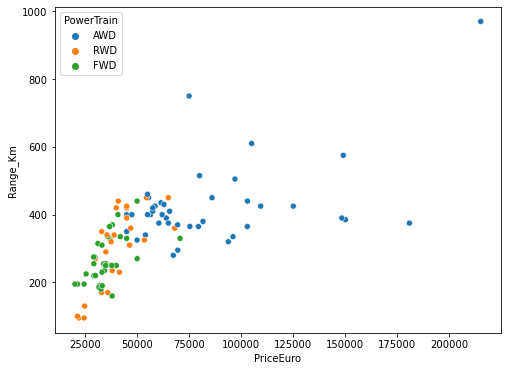

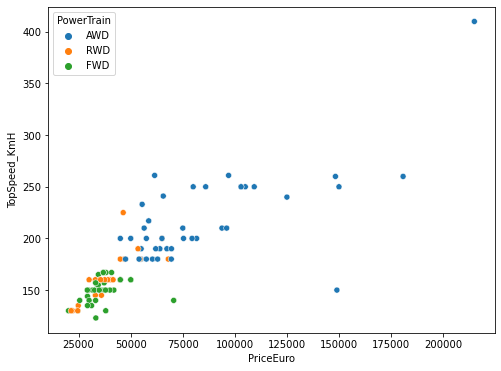

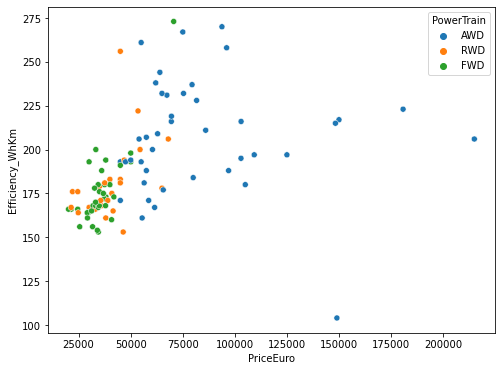

In [142]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    fig=plt.figure(figsize=(8,6))
    sns.scatterplot(data=EV,hue='PowerTrain',y=col,x='PriceEuro')
    plt.show()

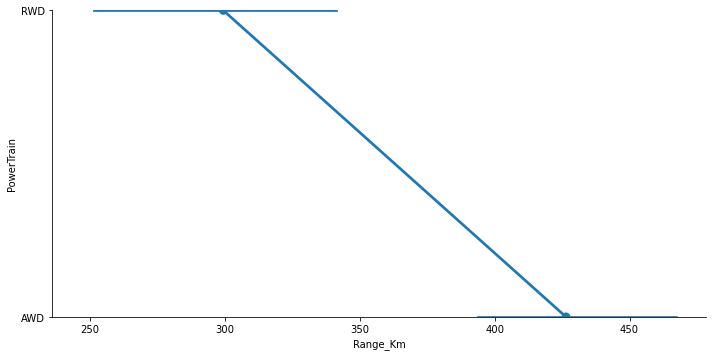

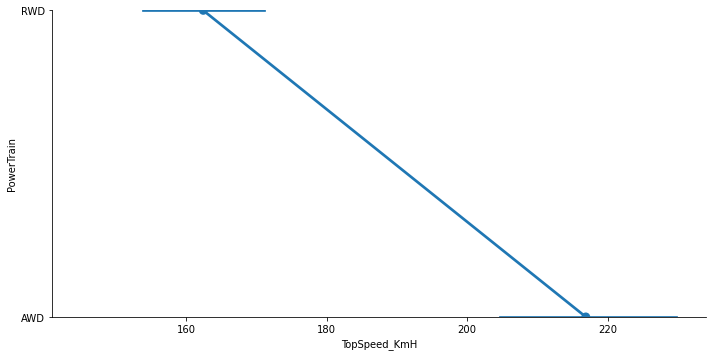

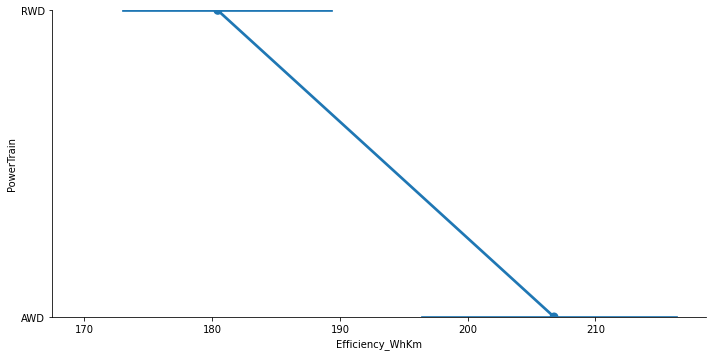

In [143]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    sns.catplot(x=col,y='PowerTrain',data=EV,kind='point',aspect=2,)
    plt.ylim(0,1)

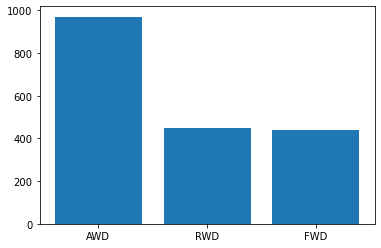

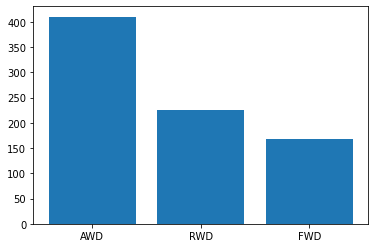

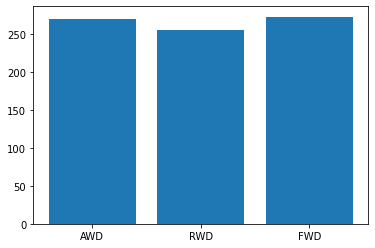

In [144]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    plt.bar(EV['PowerTrain'],EV[col],label='Top Speed')
    plt.show()

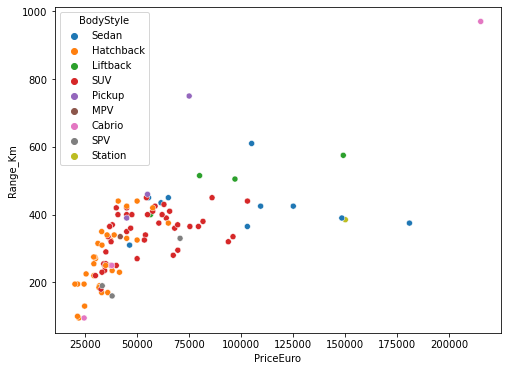

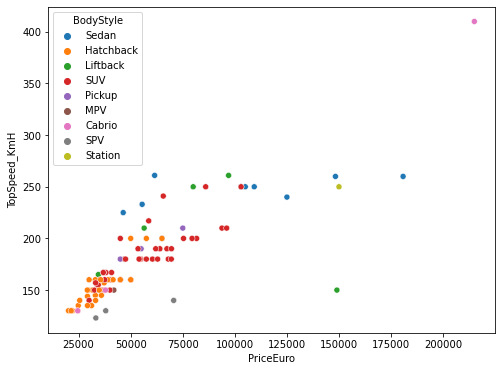

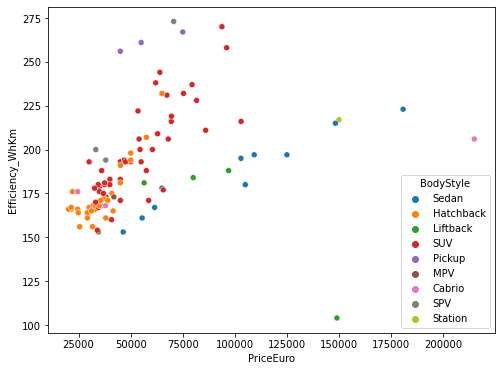

In [145]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    fig=plt.figure(figsize=(8,6))
    sns.scatterplot(data=EV,hue='BodyStyle',y=col,x='PriceEuro')
    plt.show()

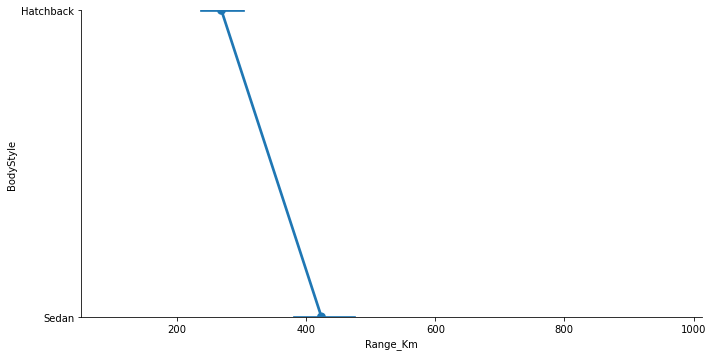

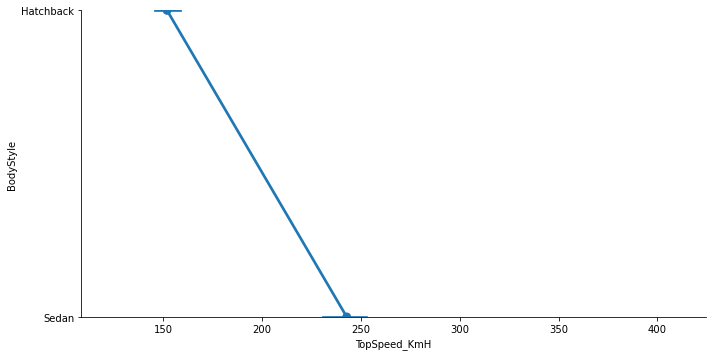

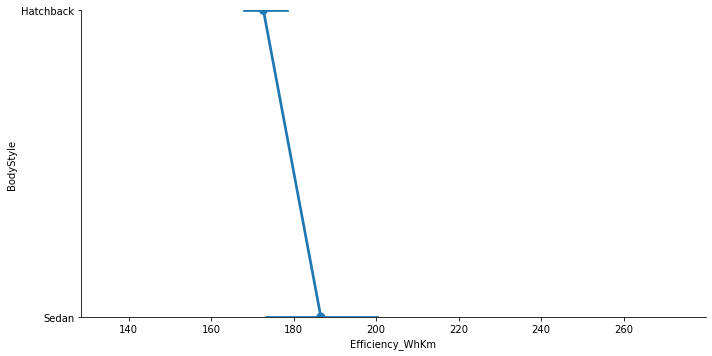

In [146]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    sns.catplot(x=col,y='BodyStyle',data=EV,kind='point',aspect=2,)
    plt.ylim(0,1)

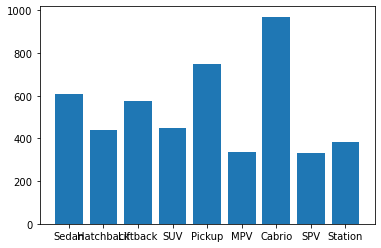

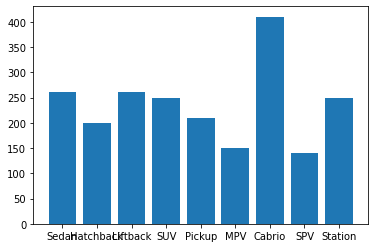

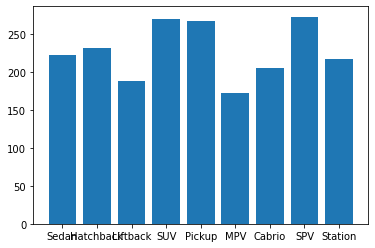

In [147]:
for col in ['Range_Km','TopSpeed_KmH','Efficiency_WhKm']:
    plt.bar(EV['BodyStyle'],EV[col],label='Top Speed')
    plt.show()

### Total number of models wrt brands

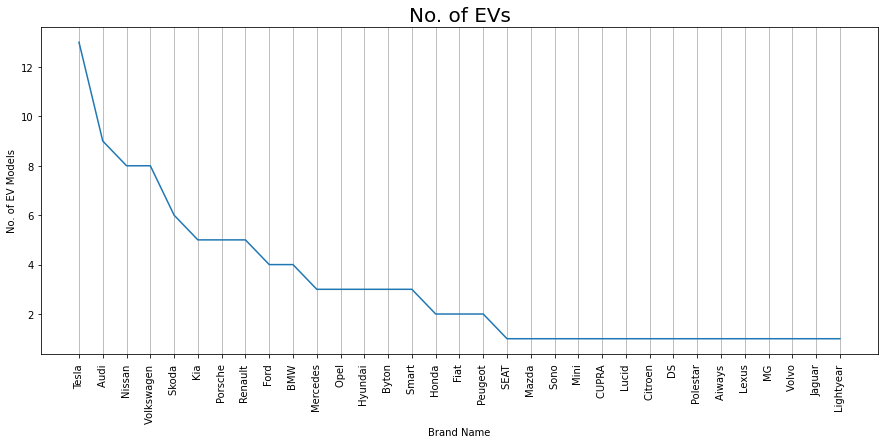

Brand with most number of vehicles


Brand
Tesla     13
Name: Model, dtype: int64

In [148]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.xlabel("Brand Name")
plt.ylabel("No. of EV Models")
plt.title('No. of EVs',fontsize=20)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

print('Brand with most number of vehicles')
EV.groupby('Brand')['Model'].count().nlargest(n=1)

### PowerTrain wrt Range_Km

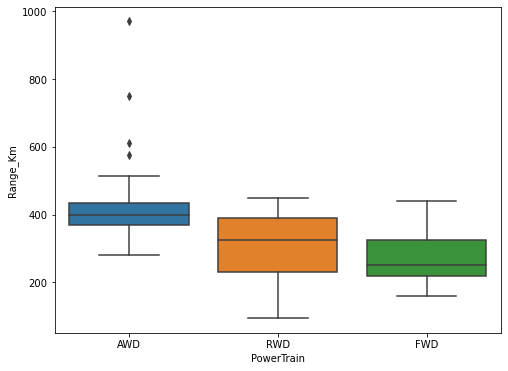

In [149]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(data=EV,x='PowerTrain',y="Range_Km")
plt.show()

### Brand wrt Range_km

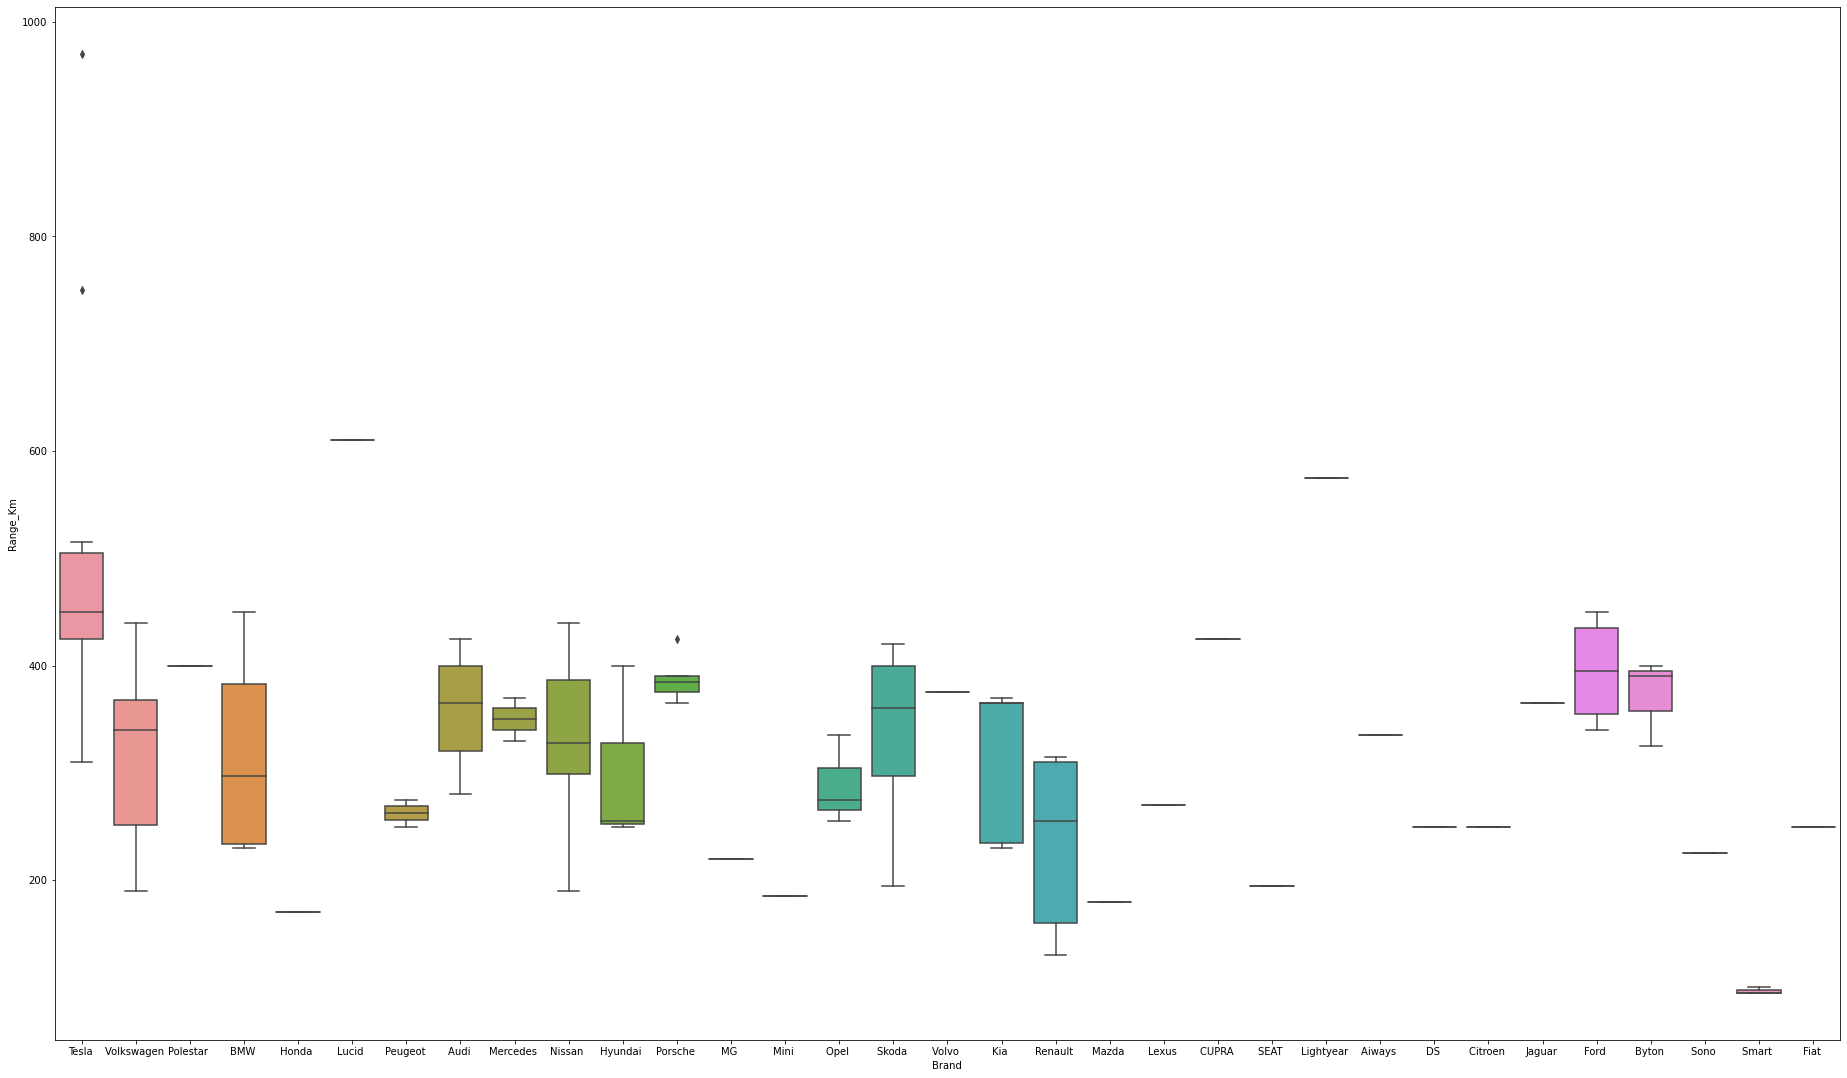

In [150]:
fig=plt.figure(figsize=(32,19))
sns.boxplot(data=EV,x='Brand',y="Range_Km")
plt.show()

### TopSpeed wrt BodyStyle

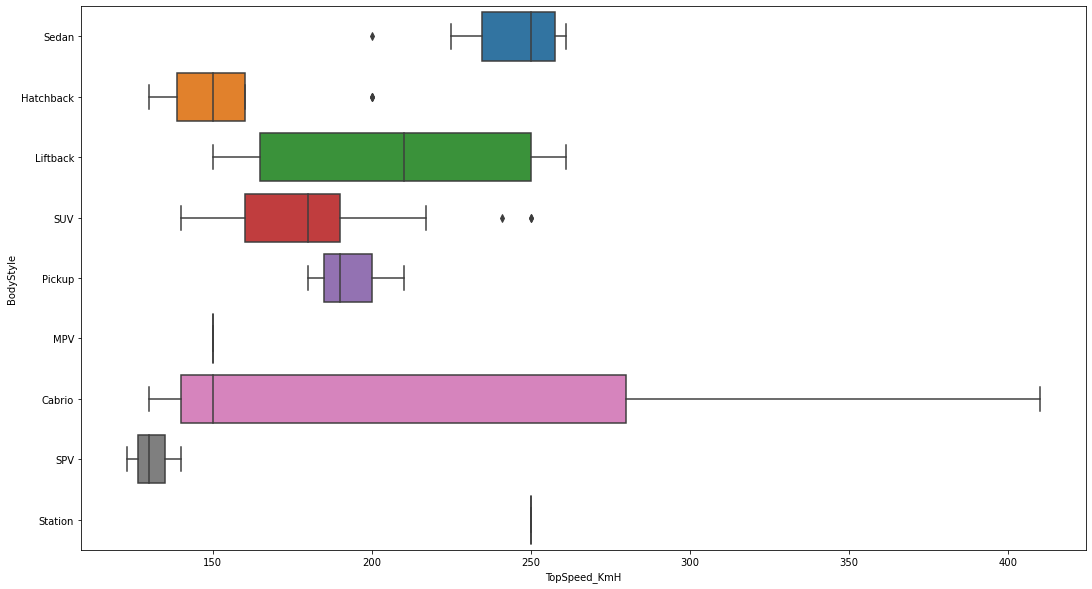

In [151]:
fig=plt.figure(figsize=(18,10))
sns.boxplot(data=EV,x='TopSpeed_KmH',y="BodyStyle")
plt.show()

In [152]:
EV.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [153]:
EV_df = EV[['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']]
EV_df

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Tesla,Model 3 Long Range Dual Motor,Yes,AWD,Type 2 CCS,Sedan,D
1,Volkswagen,ID.3 Pure,Yes,RWD,Type 2 CCS,Hatchback,C
2,Polestar,2,Yes,AWD,Type 2 CCS,Liftback,D
3,BMW,iX3,Yes,RWD,Type 2 CCS,SUV,D
4,Honda,e,Yes,RWD,Type 2 CCS,Hatchback,B
...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,Yes,FWD,Type 2 CCS,Hatchback,C
99,Audi,e-tron S Sportback 55 quattro,Yes,AWD,Type 2 CCS,SUV,E
100,Nissan,Ariya e-4ORCE 63kWh,Yes,AWD,Type 2 CCS,Hatchback,C
101,Nissan,Ariya e-4ORCE 87kWh Performance,Yes,AWD,Type 2 CCS,Hatchback,C


In [154]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

print(EV_df)

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(EV_df)
print(result)

           Brand                            Model RapidCharge PowerTrain  \
0         Tesla     Model 3 Long Range Dual Motor         Yes        AWD   
1    Volkswagen                         ID.3 Pure         Yes        RWD   
2      Polestar                                 2         Yes        AWD   
3           BMW                              iX3          Yes        RWD   
4         Honda                                e          Yes        RWD   
..           ...                              ...         ...        ...   
98       Nissan                       Ariya 63kWh         Yes        FWD   
99         Audi     e-tron S Sportback 55 quattro         Yes        AWD   
100      Nissan               Ariya e-4ORCE 63kWh         Yes        AWD   
101      Nissan   Ariya e-4ORCE 87kWh Performance         Yes        AWD   
102       Byton                 M-Byte 95 kWh 2WD         Yes        AWD   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [155]:
temp = ['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
EV.drop(temp,axis=1,inplace=True)


In [156]:
result = pd.DataFrame(result)

In [157]:
result.columns=["Brand", "Model", "RapidCharge", "PowerTrain", "PlugType", "BodyStyle", "Segment"]
result.index+=1
result

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
1,30.0,46.0,1.0,0.0,2.0,7.0,3.0
2,31.0,33.0,1.0,2.0,2.0,1.0,2.0
3,23.0,0.0,1.0,0.0,2.0,2.0,3.0
4,2.0,101.0,1.0,2.0,2.0,6.0,3.0
5,9.0,78.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,1.0,0.0,2.0,6.0,4.0
101,20.0,8.0,1.0,0.0,2.0,1.0,2.0
102,20.0,10.0,1.0,0.0,2.0,1.0,2.0


In [164]:
EV_df = EV
EV_df.index+=1

In [172]:
EV_df[['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']]


In [173]:
EV_df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,1.0,0.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,1.0,2.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,1.0,0.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,1.0,2.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,1.0,0.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,1.0,0.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,1.0,0.0,2.0,1.0,2.0


In [174]:
EV_df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,-0.514820,0.521011,-0.259657,-0.347164,-0.451568
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,0.251054,-0.560538,-0.010110,0.339230,0.670403
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,0.401290,-0.451495,0.131297,0.227477,0.628597
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,0.105673,-0.394721,-0.028761,0.373146,0.623263
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,0.423111,-0.278882,-0.029570,0.342489,0.416744
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,0.197208,-0.561584,-0.000193,0.321713,0.737106
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,-0.188137,0.056464,-0.231104,-0.275860,-0.002040
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,0.144293,-0.007609,0.023750,0.261255,0.068414
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,1.000000,-0.274797,0.539160,0.223577,0.189954
PowerTrain,0.521011,-0.560538,-0.451495,-0.394721,-0.278882,-0.561584,0.056464,-0.007609,-0.274797,1.000000,-0.039763,-0.349484,-0.497850


## Train- Test Split

In [304]:
X=EV_df[['AccelSec','TopSpeed_KmH','Range_Km','Segment','Efficiency_WhKm']]
y=EV_df['PriceEuro']

In [305]:
X

,AccelSec,TopSpeed_KmH,Range_Km,Segment,Efficiency_WhKm
1,4.6,233,450,3.0,161
2,10.0,160,270,2.0,167
3,4.7,210,400,3.0,181
4,6.8,180,360,3.0,206
5,9.5,145,170,1.0,168
...,...,...,...,...,...
99,7.5,160,330,2.0,191
100,4.5,210,335,4.0,258
101,5.9,200,325,2.0,194
102,5.1,200,375,2.0,232


In [306]:
y

1      55480
2      30000
3      56440
4      68040
5      32997
       ...  
99     45000
100    96050
101    50000
102    65000
103    62000
Name: PriceEuro, Length: 103, dtype: int64

In [307]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [308]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)

In [309]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=3000)

In [310]:
pred = model.predict(X_test)

In [311]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print('Prediction of Price is:')
print(abs(r2*100))

Prediction of Price is:
74.79694678548962


In [312]:
pred

array([ 56440,  32997,  40000,  45000,  30000,  62900,  62900,  75351,
        40000,  20129,  45000, 102990,  37900,  30000,  62900,  36837,
        40000,  30000,  79990,  22030,  30000,  62900,  33133,  36057,
        45000,  30000,  33133, 102990,  93800,  57500,  33133],
      dtype=int64)

#### Rate of prediction of EV price is 74.79%

In [330]:
X=EV_df[['AccelSec','TopSpeed_KmH','Range_Km','Segment','Efficiency_WhKm']]
y=EV_df['FastCharge_KmH']

In [331]:
X

,AccelSec,TopSpeed_KmH,Range_Km,Segment,Efficiency_WhKm
1,4.6,233,450,3.0,161
2,10.0,160,270,2.0,167
3,4.7,210,400,3.0,181
4,6.8,180,360,3.0,206
5,9.5,145,170,1.0,168
...,...,...,...,...,...
99,7.5,160,330,2.0,191
100,4.5,210,335,4.0,258
101,5.9,200,325,2.0,194
102,5.1,200,375,2.0,232


In [332]:
y

1      940
2      250
3      620
4      560
5      190
      ... 
99     440
100    540
101    440
102    450
103    480
Name: FastCharge_KmH, Length: 103, dtype: object

In [342]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=140)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3500)
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=3500)

In [343]:

pred = model.predict(X_test)

In [344]:
from sklearn.metrics import r2_score
#r2=(r2_score(y_test,pred))
print(abs(r2*100))

74.79694678548962


In [345]:
pred

array(['230', '230', '380', '470', '440', '230', '540', '540', '320',
       '470', '230', '650', '170', '480', '470', '270', '230', '470',
       '270', '650', '770', '560', '240', '540', '350', '470', '230',
       '380', '540', '440', '850'], dtype=object)

In [377]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [378]:
X=EV_df[['AccelSec','TopSpeed_KmH','Range_Km','Segment','Efficiency_WhKm']]
Y=EV_df.PriceEuro

In [379]:
lm.fit(X,Y)
yhat=lm.predict(X)
yhat

array([ 85394.99276634,  42962.96753036,  73630.68467492,  58275.15107149,
        28352.72023318, 107761.21034618,  37867.04796709,  31724.3434183 ,
        81050.28459899,  59250.71899548,  58066.81784643,  35761.0457057 ,
        40529.72053832,  69680.97880946,  45807.18486786,  44026.81957833,
       108547.51180115,  14413.02800416,  25379.97281197,  31578.47487745,
        31724.3434183 ,  77417.7633564 ,  42519.49230828, 101012.83642416,
        97837.47047114,  43545.59269939,  43697.00821931,  51786.23157172,
        31686.88198129,  30720.51542247,  68147.61886464,  46817.17568394,
        24753.15285506,  93472.39029831,  37383.30571567,  42077.14553491,
        42003.27622882,  43800.57799122,  27071.18942998,  62076.48131398,
       106775.57039745,  34116.71189272,  73665.28909321,  14364.05397794,
        14364.05397794,  39553.18514794,  31806.32857627, 105160.08310741,
        65000.48920201,  37987.12867258,  73121.58699526, 195885.28516695,
        30950.43326149,  

In [380]:
lm.coef_

array([-1.22435066e+02,  4.53328797e+02,  7.03652271e+00,  7.11919680e+03,
       -4.86838064e+01])

In [381]:
lm.intercept_

-36353.348347978324

In [382]:
yhat=lm.predict(X)
yhat

array([ 85394.99276634,  42962.96753036,  73630.68467492,  58275.15107149,
        28352.72023318, 107761.21034618,  37867.04796709,  31724.3434183 ,
        81050.28459899,  59250.71899548,  58066.81784643,  35761.0457057 ,
        40529.72053832,  69680.97880946,  45807.18486786,  44026.81957833,
       108547.51180115,  14413.02800416,  25379.97281197,  31578.47487745,
        31724.3434183 ,  77417.7633564 ,  42519.49230828, 101012.83642416,
        97837.47047114,  43545.59269939,  43697.00821931,  51786.23157172,
        31686.88198129,  30720.51542247,  68147.61886464,  46817.17568394,
        24753.15285506,  93472.39029831,  37383.30571567,  42077.14553491,
        42003.27622882,  43800.57799122,  27071.18942998,  62076.48131398,
       106775.57039745,  34116.71189272,  73665.28909321,  14364.05397794,
        14364.05397794,  39553.18514794,  31806.32857627, 105160.08310741,
        65000.48920201,  37987.12867258,  73121.58699526, 195885.28516695,
        30950.43326149,  

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



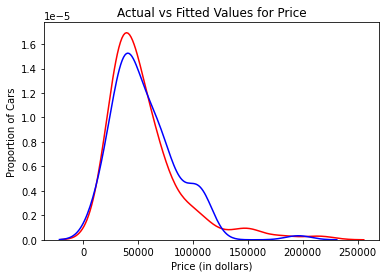

In [384]:
ax1 = sns.distplot(EV["PriceEuro"], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [385]:
lm.score(X,Y)

0.7484471670432014